In [104]:
import pandas as pd

import matplotlib.pyplot as plt

In [105]:
rawRealEstateDF = pd.read_csv("realEstateData.csv")

rawRealEstateDF.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [106]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 143840
The number of na values in the bath col is 123509
The number of na values in the acre_lot col is 319197
The number of na values in the city col is 231
The number of na values in the state col is 0
The number of na values in the zip_code col is 231
The number of na values in the house_size col is 342084
The number of na values in the prev_sold_date col is 517985
The number of na values in the price col is 72


We see that there is a large amount of NA values for most of the columns in this data set, to which there will be a variety of methods to correct these values. 

In [107]:
bedDF = rawRealEstateDF["bed"]

In [108]:
bedDF.tail()

1048570    5.0
1048571    7.0
1048572    5.0
1048573    4.0
1048574    3.0
Name: bed, dtype: float64

In [109]:
bedDF.fillna(0, inplace=True)

In [110]:
bedDF.tail()

1048570    5.0
1048571    7.0
1048572    5.0
1048573    4.0
1048574    3.0
Name: bed, dtype: float64

In [111]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 0
The number of na values in the bath col is 123509
The number of na values in the acre_lot col is 319197
The number of na values in the city col is 231
The number of na values in the state col is 0
The number of na values in the zip_code col is 231
The number of na values in the house_size col is 342084
The number of na values in the prev_sold_date col is 517985
The number of na values in the price col is 72


To fill the NAs of the bed column, an assumption was made that an NA value correlated with there being 0 bedrooms on the property being sold

In [112]:
bathDF = rawRealEstateDF["bath"]

In [113]:
bathDF.tail()

1048570    4.0
1048571    4.0
1048572    3.0
1048573    3.0
1048574    3.0
Name: bath, dtype: float64

In [114]:
bathDF.fillna(0, inplace=True)

In [115]:
bedDF.tail()

1048570    5.0
1048571    7.0
1048572    5.0
1048573    4.0
1048574    3.0
Name: bed, dtype: float64

In [116]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 0
The number of na values in the bath col is 0
The number of na values in the acre_lot col is 319197
The number of na values in the city col is 231
The number of na values in the state col is 0
The number of na values in the zip_code col is 231
The number of na values in the house_size col is 342084
The number of na values in the prev_sold_date col is 517985
The number of na values in the price col is 72


The same assumption made for the bed column was also made for the bath column, where if it was an NA value it was assumed it meant 0 bathrooms on the property

In [117]:
acreDF = rawRealEstateDF["acre_lot"]

In [118]:
acreValuesDF = acreDF.value_counts()

In [119]:
acreValuesDF

acre_lot
0.06       29156
0.11       26843
0.05       23579
0.09       20605
0.04       18703
           ...  
21.14          1
26.72          1
87.23          1
67.84          1
2200.00        1
Name: count, Length: 3340, dtype: int64

In [120]:
acreValuesDF.max()

29156

In [121]:
acreValuesDF.min()

1

In [122]:
filteredAcreValuesDF = acreValuesDF[acreValuesDF > 1400]

In [123]:
filteredAcreValuesDF

acre_lot
0.06    29156
0.11    26843
0.05    23579
0.09    20605
0.04    18703
        ...  
1.02     1543
0.62     1538
5.00     1523
0.94     1493
1.38     1451
Name: count, Length: 80, dtype: int64

In [124]:
acreLotValues = filteredAcreValuesDF.index.tolist()
acreLotValues

[0.06,
 0.11,
 0.05,
 0.09,
 0.04,
 0.17,
 0.07,
 0.23,
 0.14,
 0.08,
 0.12,
 0.1,
 0.13,
 0.02,
 0.03,
 0.15,
 0.18,
 0.16,
 0.22,
 0.2,
 0.21,
 1.0,
 0.19,
 0.34,
 0.24,
 0.25,
 0.26,
 0.28,
 0.46,
 0.29,
 0.3,
 0.35,
 0.01,
 2.0,
 0.27,
 0.5,
 0.33,
 0.32,
 0.92,
 0.36,
 0.37,
 0.31,
 0.4,
 0.49,
 0.38,
 0.41,
 0.39,
 0.69,
 0.48,
 0.47,
 0.51,
 0.45,
 0.52,
 0.44,
 0.42,
 0.7,
 3.0,
 1.5,
 0.57,
 0.56,
 0.6,
 0.53,
 0.54,
 0.43,
 1.1,
 0.75,
 1.01,
 0.55,
 1.2,
 1.03,
 0.58,
 0.59,
 1.3,
 1.4,
 0.93,
 1.02,
 0.62,
 5.0,
 0.94,
 1.38]

In [147]:
import numpy as np

acre_lot_values = filteredAcreValuesDF.index.tolist()

random_indices = np.random.choice(len(acre_lot_values), size=rawRealEstateDF['acre_lot'].isnull().sum(), replace=True)

random_values = [acre_lot_values[i] for i in random_indices]

rawRealEstateDF.loc[rawRealEstateDF['acre_lot'].isnull(), 'acre_lot'] = random_values

rawRealEstateDF.head(25)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,New Listing,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,New Listing,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,New Listing,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,New Listing,145000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,New Listing,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,New Listing,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,New Listing,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,New Listing,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,New Listing,300000.0
10,for_sale,3.0,2.0,13.39,Isabela,Puerto Rico,662.0,1106.0,New Listing,89000.0


Look at line 23 above and see that there is a new value (randomized) and inserted where there used to be an NA value. This NA value can be seen at line 25 in the original CSV. (The data lines up, the difference in the number of lines is shown by the use of 0 and a column title above)

In [126]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 0
The number of na values in the bath col is 0
The number of na values in the acre_lot col is 0
The number of na values in the city col is 231
The number of na values in the state col is 0
The number of na values in the zip_code col is 231
The number of na values in the house_size col is 342084
The number of na values in the prev_sold_date col is 517985
The number of na values in the price col is 72


In order to clean the NA values for the acre_lot column, a more feasible approach had to be made beyond a rough assumption. The approach needed to be based in mathematics as we were dealing with the size of a lot, and while this approach would never be 100% accurate, I believe I found the best possible approach. I found the frequency of every numerical value of acreage and took the top 1400 as I determined those to be the most useful for my approach. With those top 1400 most frequent values, I created a randomizer to which a random value from that set would be placed in place of any NA value in the acreage column. It is not the most accruate model, however, I believe it is a lot better than simply replacing all the NA values with the median of the set, as there were over 300k+ na values, to which the median would skyrocket this value making it the ultimate outlier. ChatGPT was used for this section as I have not learned how to created a randomizer. After making my different dataframes I simply just asked it how to create a randomizer and how to replace the NA values with a random value from the DF containing all values with a frequency of higher than 1400.

In [127]:
naCityRows = rawRealEstateDF[rawRealEstateDF['city'].isna()]
naCityRows

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
679,for_sale,3.0,1.0,0.05,NaN,Puerto Rico,NaN,790.0,NaN,58000.0
917,for_sale,3.0,1.0,0.05,NaN,Puerto Rico,NaN,790.0,NaN,58000.0
1022,for_sale,3.0,1.0,0.05,NaN,Puerto Rico,NaN,790.0,NaN,58000.0
1195,for_sale,0.0,0.0,1.40,NaN,Puerto Rico,NaN,NaN,NaN,650000.0
1451,for_sale,3.0,1.0,0.05,NaN,Puerto Rico,NaN,790.0,NaN,58000.0
...,...,...,...,...,...,...,...,...,...,...
918098,for_sale,5.0,7.0,13.34,NaN,Connecticut,NaN,6343.0,NaN,2700000.0
940643,for_sale,5.0,7.0,13.34,NaN,Connecticut,NaN,6343.0,NaN,2700000.0
1023334,for_sale,5.0,2.0,0.13,NaN,New York,NaN,1925.0,NaN,710000.0
1027846,for_sale,0.0,1.0,0.69,NaN,New York,NaN,NaN,NaN,399500.0


In [128]:
rawRealEstateDF.dropna(subset=['city', 'zip_code'], how='all', inplace=True)

In [129]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 0
The number of na values in the bath col is 0
The number of na values in the acre_lot col is 0
The number of na values in the city col is 0
The number of na values in the state col is 0
The number of na values in the zip_code col is 0
The number of na values in the house_size col is 341993
The number of na values in the prev_sold_date col is 517754
The number of na values in the price col is 72


My logic for flat out removing the rows with no city and no zip code listed is that there is no possible way to make an educated guess on what the city or zipcode could be based on the information in the rows where there were NAs for City and Zip Code. 

In [130]:
rawRealEstateDF.dropna(subset=['house_size'], inplace=True)

In [131]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 0
The number of na values in the bath col is 0
The number of na values in the acre_lot col is 0
The number of na values in the city col is 0
The number of na values in the state col is 0
The number of na values in the zip_code col is 0
The number of na values in the house_size col is 0
The number of na values in the prev_sold_date col is 338757
The number of na values in the price col is 72


I have also decided to remove the rows with no house size listed. In my opinion, there are way too many variable in play in order to try and fill in the data with an estimated guess on what the house size could be. The fact of whether it is a residental or commercial building, how many bedrooms/bathrooms, how big the lot is, where the lot is located statewise and the city it is in as well. There are too many variables in play for me to properly make a good estimate to what the missing housing sizes could be. It is not impossible, but for me it is too much. While this will be taking away a good third of the data set away, it still leaves an incredibly high amount of entries left in the dataset. 

In [132]:
rawRealEstateDF['prev_sold_date'].fillna('New Listing', inplace=True)

rawRealEstateDF

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,New Listing,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,New Listing,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,New Listing,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,New Listing,145000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,New Listing,179000.0
...,...,...,...,...,...,...,...,...,...,...
1048564,for_sale,4.0,4.0,0.09,Hollis,New York,11423.0,2000.0,5/24/2017,1448000.0
1048565,for_sale,4.0,2.0,0.07,Hollis,New York,11423.0,1596.0,12/18/1986,799000.0
1048566,for_sale,5.0,2.0,0.08,Hollis,New York,11423.0,1750.0,12/17/2021,988000.0
1048569,for_sale,3.0,4.0,0.09,Hollis,New York,11423.0,3100.0,8/17/2006,1690000.0


In [133]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 0
The number of na values in the bath col is 0
The number of na values in the acre_lot col is 0
The number of na values in the city col is 0
The number of na values in the state col is 0
The number of na values in the zip_code col is 0
The number of na values in the house_size col is 0
The number of na values in the prev_sold_date col is 0
The number of na values in the price col is 72


My logic in the cleaning process for the "prev_sold_date" column is that I believe if there is not a date listed for "Previous Sold Date", this has to be a new listing. So instead of just removing these values, replace the NA values with "New Listing" to more accurately portray the data in hand.

In [134]:
rawRealEstateDF.dropna(subset=['price'], inplace=True)

In [135]:
for col in rawRealEstateDF:
    naCount = rawRealEstateDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the status col is 0
The number of na values in the bed col is 0
The number of na values in the bath col is 0
The number of na values in the acre_lot col is 0
The number of na values in the city col is 0
The number of na values in the state col is 0
The number of na values in the zip_code col is 0
The number of na values in the house_size col is 0
The number of na values in the prev_sold_date col is 0
The number of na values in the price col is 0


I employed the same logic I employed for the cleaning of "house_size" onto "price" as there are way too many variables to take into account to calculate an educated guess for price. You have all the variables required for "house_size" and then you need to include the size of the house as well in determining the price. I believe it is best to remove these rows all together. 

In [136]:
rawRealEstateDF

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,New Listing,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,New Listing,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,New Listing,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,New Listing,145000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,New Listing,179000.0
...,...,...,...,...,...,...,...,...,...,...
1048564,for_sale,4.0,4.0,0.09,Hollis,New York,11423.0,2000.0,5/24/2017,1448000.0
1048565,for_sale,4.0,2.0,0.07,Hollis,New York,11423.0,1596.0,12/18/1986,799000.0
1048566,for_sale,5.0,2.0,0.08,Hollis,New York,11423.0,1750.0,12/17/2021,988000.0
1048569,for_sale,3.0,4.0,0.09,Hollis,New York,11423.0,3100.0,8/17/2006,1690000.0


After the data cleaning process, we are left with just over 700k real estate listings to work with. To further build on this, I want to do my analysis on the top 1 percent of listing prices. I want to show my company what it takes to compete with the highest of prices and how to cater to customers in the top 1 percentile.

In [137]:
top1PercentDF = rawRealEstateDF['price'].quantile(0.99)

In [138]:
topHousePriceDF = rawRealEstateDF[rawRealEstateDF['price'] >= top1PercentDF]

topHousePriceDF

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
56,for_sale,6.0,5.0,0.12,Aguada,Puerto Rico,602.0,6000.0,New Listing,10000000.0
330,for_sale,4.0,5.0,1.98,Dorado,Puerto Rico,646.0,7000.0,New Listing,11500000.0
636,for_sale,4.0,7.0,0.37,Dorado,Puerto Rico,646.0,7096.0,New Listing,12000000.0
643,for_sale,4.0,7.0,0.75,Dorado,Puerto Rico,646.0,7000.0,New Listing,16000000.0
655,for_sale,4.0,5.0,1.98,Dorado,Puerto Rico,646.0,7000.0,New Listing,11500000.0
...,...,...,...,...,...,...,...,...,...,...
1047580,for_sale,6.0,7.0,0.15,New York City,New York,10017.0,8000.0,4/24/2014,10500000.0
1047633,for_sale,3.0,4.0,1.01,New York,New York,10012.0,3840.0,New Listing,18000000.0
1047645,for_sale,3.0,3.0,5.00,New York,New York,10012.0,3273.0,New Listing,10000000.0
1047697,for_sale,12.0,12.0,0.04,New York City,New York,10030.0,7064.0,New Listing,12500000.0


In [139]:
stateGroupDF = topHousePriceDF.groupby(["state"]).size()

stateGroupDF

state
Connecticut        383
Maine               42
Massachusetts     1215
New Hampshire       99
New Jersey          88
New York          5270
Pennsylvania        13
Puerto Rico        120
Rhode Island         5
Virgin Islands       8
dtype: int64

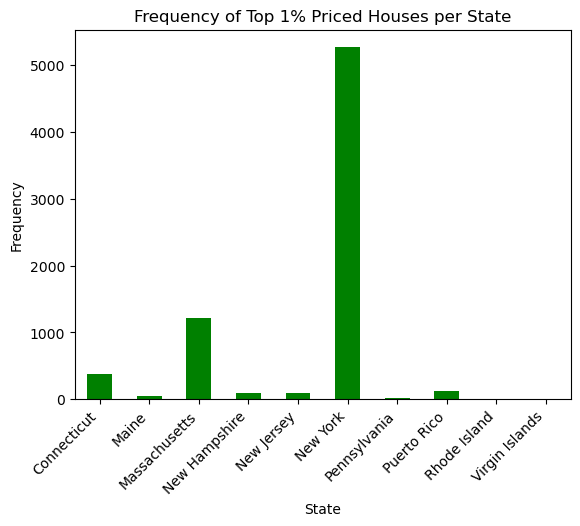

In [140]:
stateGroupDF.plot(kind='bar', color= "green")

plt.title('Frequency of Top 1% Priced Houses per State')
plt.xlabel('State')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')

plt.show()

In [141]:
houseNewYorkDF = topHousePriceDF[topHousePriceDF['state'] == 'New York']

houseNewYorkDF

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
57129,for_sale,8.0,10.0,157.00,Chatham,New York,12136.0,14058.0,10/20/2009,15000000.0
63917,for_sale,8.0,10.0,157.00,Chatham,New York,12136.0,14058.0,10/20/2009,15000000.0
64244,for_sale,10.0,17.0,200.00,Millbrook,New York,12545.0,34000.0,New Listing,14000000.0
64459,for_sale,5.0,7.0,130.86,Millbrook,New York,12545.0,6054.0,New Listing,14500000.0
64684,for_sale,8.0,7.0,107.00,Millbrook,New York,12545.0,8224.0,6/2/1992,9950000.0
...,...,...,...,...,...,...,...,...,...,...
1047580,for_sale,6.0,7.0,0.15,New York City,New York,10017.0,8000.0,4/24/2014,10500000.0
1047633,for_sale,3.0,4.0,1.01,New York,New York,10012.0,3840.0,New Listing,18000000.0
1047645,for_sale,3.0,3.0,5.00,New York,New York,10012.0,3273.0,New Listing,10000000.0
1047697,for_sale,12.0,12.0,0.04,New York City,New York,10030.0,7064.0,New Listing,12500000.0


C:\Users\cjroo\AppData\Local\Temp\ipykernel_28168\3602197860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseNewYorkDF['prev_sold_date_modified'] = houseNewYorkDF['prev_sold_date'].apply(lambda x: x if x == 'New Listing' else 'Previously Sold')


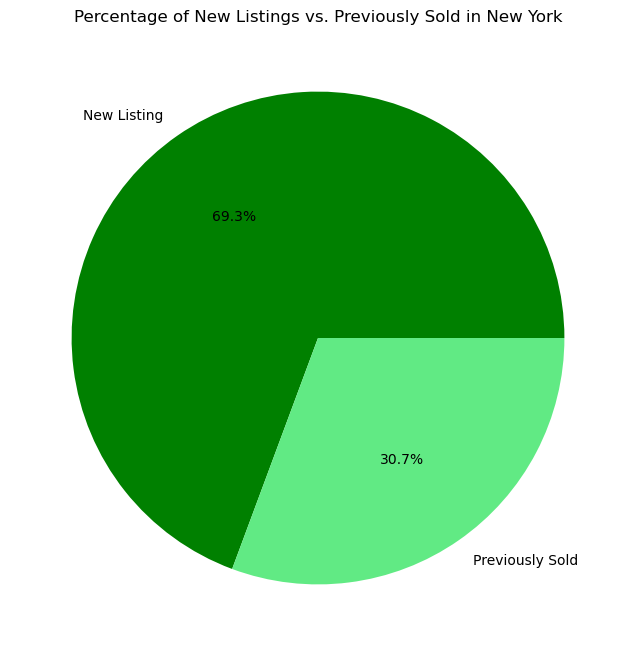

In [142]:
houseNewYorkDF['prev_sold_date_modified'] = houseNewYorkDF['prev_sold_date'].apply(lambda x: x if x == 'New Listing' else 'Previously Sold')

countPrevSoldDate = houseNewYorkDF['prev_sold_date_modified'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(countPrevSoldDate, labels=countPrevSoldDate.index, autopct='%1.1f%%', colors= ["green", "#61EA84"])

plt.title('Percentage of New Listings vs. Previously Sold in New York')

plt.show()

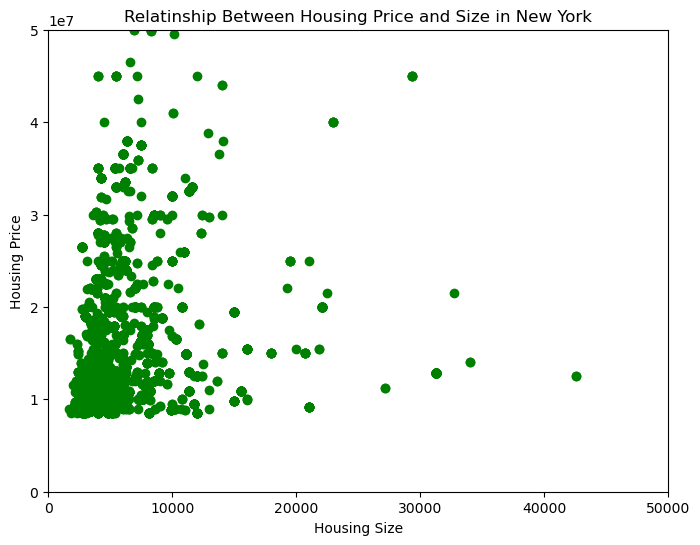

In [143]:
housePrice = houseNewYorkDF['price']
houseSize = houseNewYorkDF['house_size']

plt.figure(figsize=(8, 6))
plt.scatter(houseSize, housePrice, color='green')

plt.xlabel('Housing Size')
plt.ylabel('Housing Price')
plt.title("Relatinship Between Housing Price and Size in New York")

plt.xlim(0, 50000) 
plt.ylim(0, 50000000) 

plt.show()

C:\Users\cjroo\AppData\Local\Temp\ipykernel_28168\1976131205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseNewYorkDF['city_modified'] = houseNewYorkDF['city'].apply(lambda x: x if x == 'New York City' else 'All Other Cities')


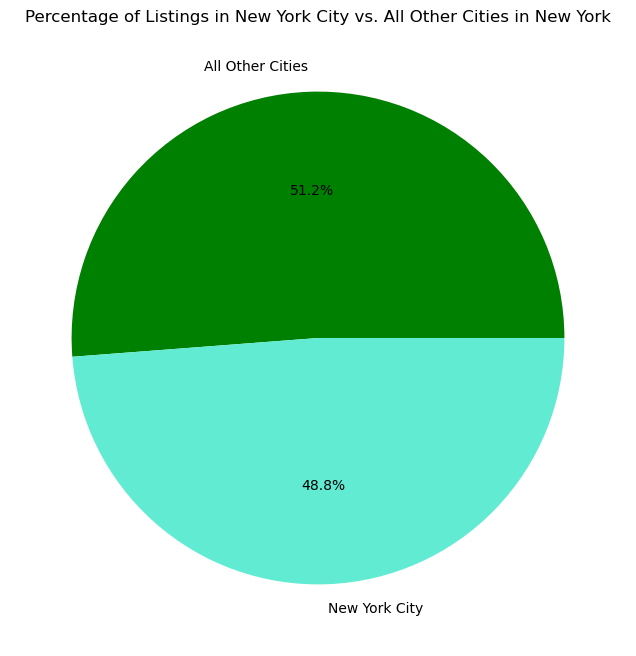

In [144]:
houseNewYorkDF['city_modified'] = houseNewYorkDF['city'].apply(lambda x: x if x == 'New York City' else 'All Other Cities')

countCity = houseNewYorkDF['city_modified'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(countCity, labels=countCity.index, autopct='%1.1f%%', colors= ["green", "#60EBD2"])

plt.title('Percentage of Listings in New York City vs. All Other Cities in New York')

plt.show()

In [145]:
houseNewYorkCityDF = houseNewYorkDF[houseNewYorkDF['city'] == 'New York City']

houseNewYorkCityDF

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_date_modified,city_modified
465077,for_sale,5.0,6.0,0.41,New York City,New York,10013.0,7020.0,10/6/2015,22000000.0,Previously Sold,New York City
465100,for_sale,3.0,3.0,0.07,New York City,New York,10012.0,2617.0,3/12/2008,8625000.0,Previously Sold,New York City
465642,for_sale,6.0,5.0,0.04,New York City,New York,10024.0,5120.0,7/24/2008,8500000.0,Previously Sold,New York City
465911,for_sale,4.0,4.0,0.02,New York City,New York,10014.0,3650.0,7/27/2018,12995000.0,Previously Sold,New York City
465981,for_sale,6.0,4.0,0.04,New York City,New York,10014.0,3520.0,New Listing,8995000.0,New Listing,New York City
...,...,...,...,...,...,...,...,...,...,...,...,...
1047550,for_sale,8.0,10.0,0.05,New York City,New York,10023.0,12000.0,New Listing,65000000.0,New Listing,New York City
1047561,for_sale,3.0,4.0,0.25,New York City,New York,10013.0,3697.0,New Listing,10977750.0,New Listing,New York City
1047580,for_sale,6.0,7.0,0.15,New York City,New York,10017.0,8000.0,4/24/2014,10500000.0,Previously Sold,New York City
1047697,for_sale,12.0,12.0,0.04,New York City,New York,10030.0,7064.0,New Listing,12500000.0,New Listing,New York City


C:\Users\cjroo\AppData\Local\Temp\ipykernel_28168\3826222745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houseNewYorkCityDF['listing_type'] = houseNewYorkCityDF['prev_sold_date'].apply(lambda x: 'New Listing' if x == 'New Listing' else 'Previously Sold')


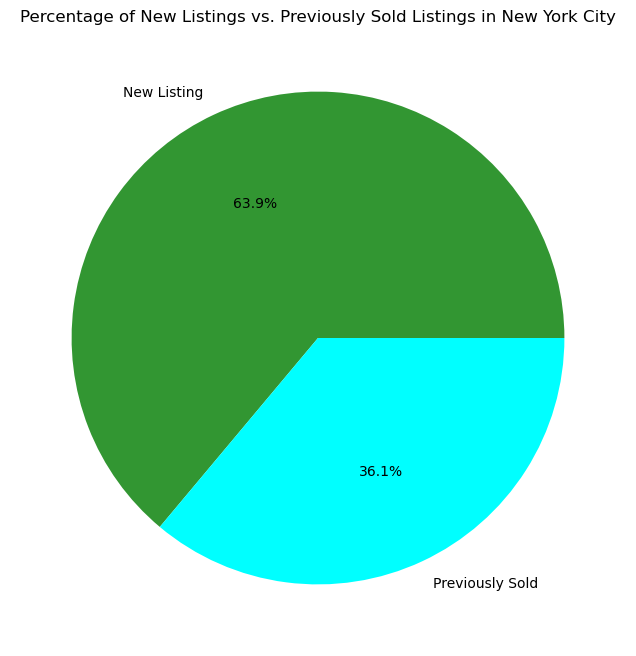

In [146]:
houseNewYorkCityDF['listing_type'] = houseNewYorkCityDF['prev_sold_date'].apply(lambda x: 'New Listing' if x == 'New Listing' else 'Previously Sold')

countListingType = houseNewYorkCityDF['listing_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(countListingType, labels=countListingType.index, autopct='%1.1f%%', colors= ["#329632", "cyan"])


plt.title('Percentage of New Listings vs. Previously Sold Listings in New York City')

plt.show()